In [4]:
%matplotlib inline

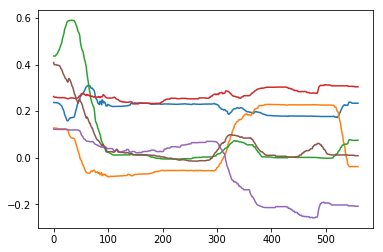

In [32]:
#### read in the txt file
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess
raw_data = np.loadtxt('spoon_poses_both.txt', delimiter=',')
plt.plot(raw_data[:,(1,2,3,8,9,10)])

In [56]:
import transforms3d as t3d
q = [0, 0, 0, 1] # 180 degree rotation around z axis (w,x,y,z)
M = t3d.quaternions.quat2mat(q) # from this module
T = [[0.45, 0.06, 0]]
transform = np.concatenate((np.concatenate((M,np.transpose(T)),1),[[0,0,0,1]]))
transform

array([[-1.  ,  0.  ,  0.  ,  0.45],
       [ 0.  , -1.  ,  0.  ,  0.06],
       [ 0.  ,  0.  ,  1.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ]])

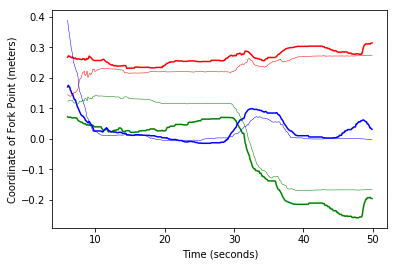

In [87]:
time = np.size(raw_data,0)

homogeneous_follower = np.transpose(np.concatenate((raw_data[:,1:4],np.ones((time,1))),1))

follower = np.transpose(np.dot(transform, homogeneous_follower))

follower.shape

same_frame_data = np.concatenate((raw_data[:,8:11],follower[:,0:3]),1)
from cycler import cycler
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = cycler(color='rgb')

relevant_indices = range(60,500)
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],raw_data[relevant_indices,8:11])
plt.plot(raw_data[relevant_indices,0] - raw_data[0,0],follower[relevant_indices,0:3],linewidth=0.5)
plt.xlabel("Time (seconds)")
plt.ylabel("Coordinate of Fork Point (meters)");

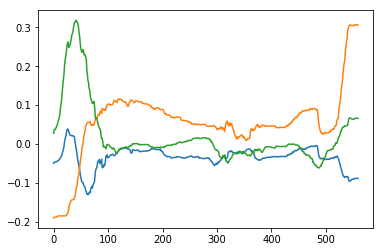

In [69]:
difference = same_frame_data[:,3:6] - same_frame_data[:,0:3]
plt.plot(difference)

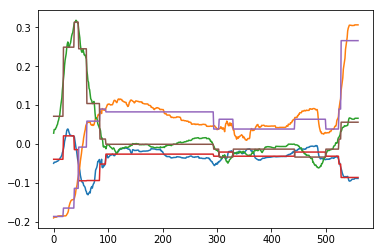

In [72]:
# complete example for alexandre
import matplotlib.pyplot as plt

# set up hidden markov model parameters
from hmmlearn import hmm

# helper function to plot simple gaussian-emmision HMM model with n_components states
def plot_with_n_components(n_components, z_data):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="full", n_iter=100, params ="smtc")
    model.fit(z_data)
    est_z = model.predict(z_data)
    plt.plot(z_data)
    plt.plot(model.means_[est_z])

# First division is the nice "waiting/feeding"
plot_with_n_components(10,difference)


In [73]:
np.savetxt("spoon_positions.txt",same_frame_data)